# Data Science & Business Analytics

# Name : Sumeet Butte

# TASK 2 - Prediction using Unsupervised ML


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv(r"C:\Users\sumit\Downloads\Iris.csv")

In [4]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df=df1.drop("Species",axis=1)

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [44]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df[["PetalLengthCm","PetalWidthCm"]])
    wcss.append(km.inertia_)


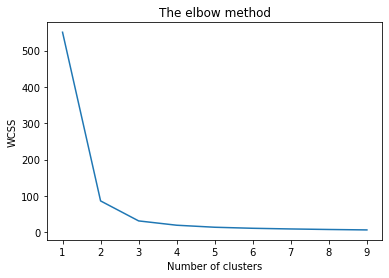

In [45]:
# plotting the result onto the graph
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["PetalLengthCm","PetalWidthCm"]])
y_predicted


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
df["clusters"]=y_predicted

In [55]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

In [56]:
df2=df[df.clusters==0]
df3=df[df.clusters==1]
df4=df[df.clusters==2]

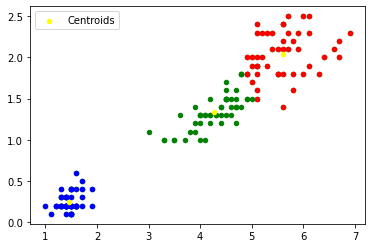

In [61]:
# Visualising the clusters - On the first two columns

plt.scatter(df1.PetalLengthCm,df1["PetalWidthCm"],s = 20,c="green")
plt.scatter(df2.PetalLengthCm,df2["PetalWidthCm"],s = 20,c="red")
plt.scatter(df3.PetalLengthCm,df3["PetalWidthCm"],s = 20,c="blue")

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 20, c = 'yellow', label = 'Centroids')

plt.legend()